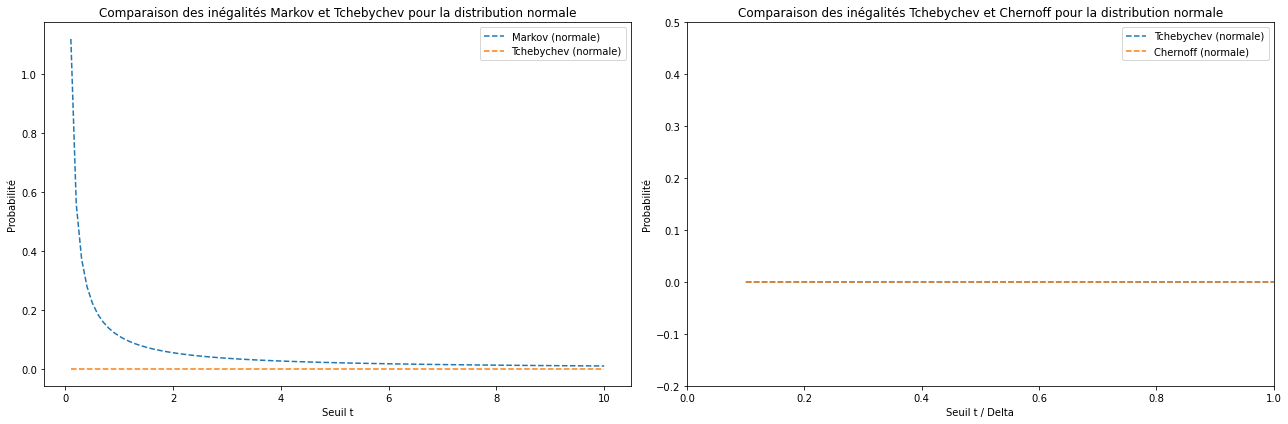

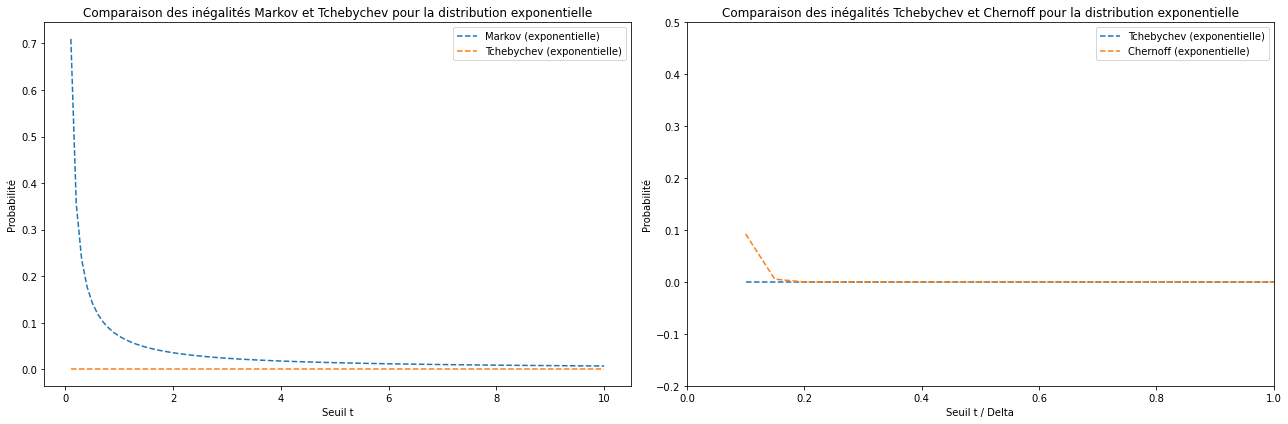

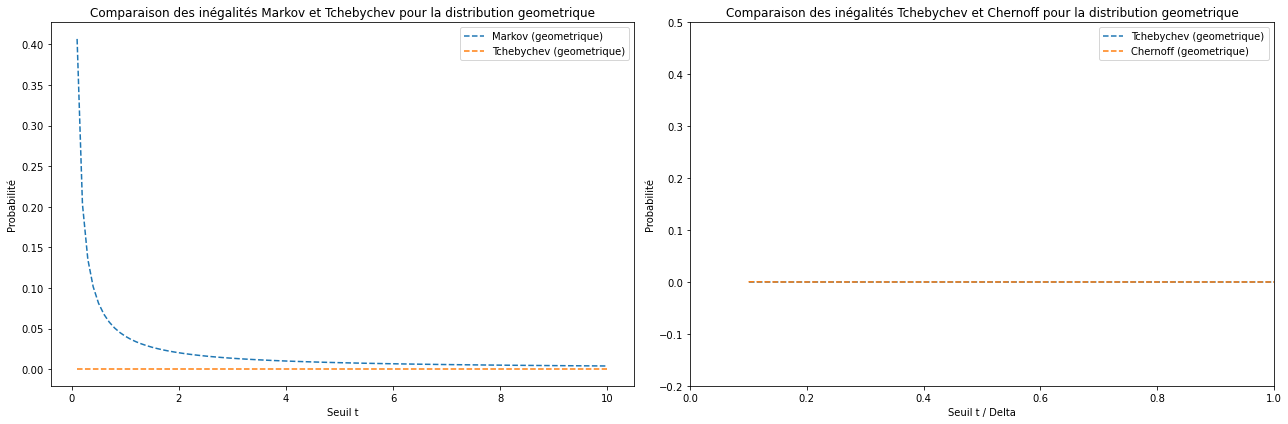

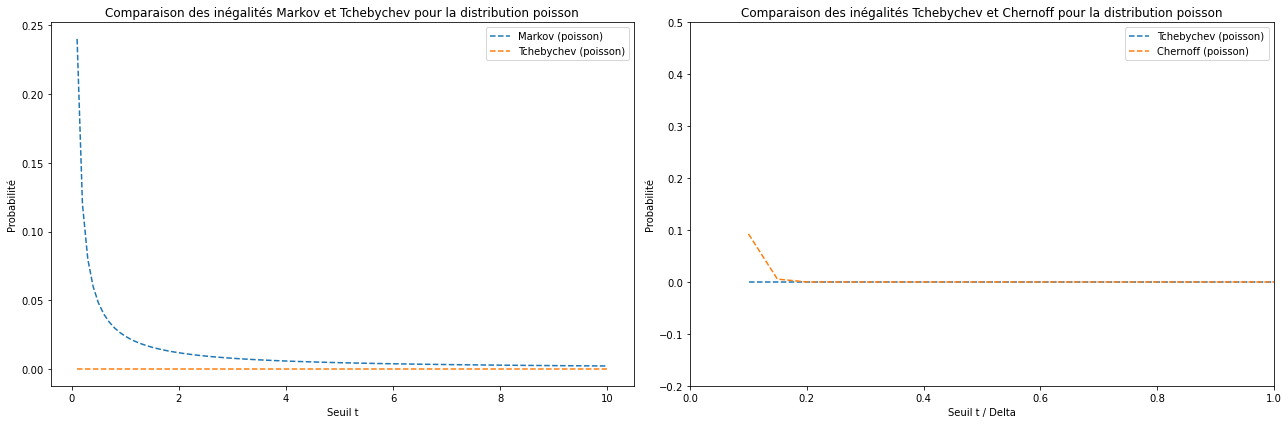

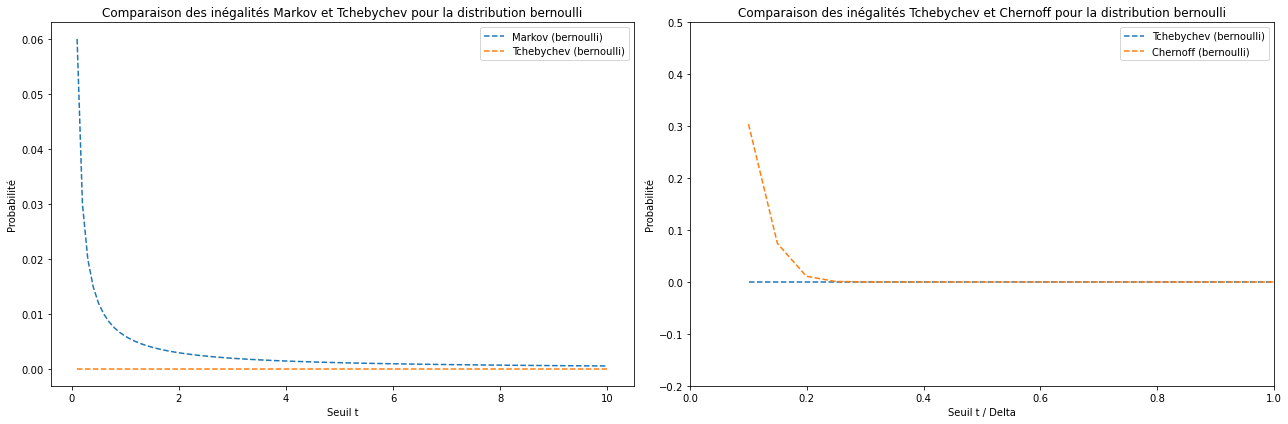

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, poisson, geom, expon, norm
import seaborn as sns

def markov_inequality(esperance, X, i, t):
    differences = []    
    for _ in range(i):
        empirical_mean = np.mean(X)
        diff = np.abs(empirical_mean - esperance)
        differences.append(diff)
    expectation_difference_abs = np.mean(differences)
    return expectation_difference_abs / t

def tchebychev_inequality(X, esperance, i, t):
    differences = []    
    for _ in range(i):
        empirical_mean = np.mean(X)
        diff = np.abs(empirical_mean - esperance)
        differences.append(diff)
    variance_difference = np.var(differences)
    return variance_difference / t**2

def chernoff_inequality(esperance, n, delta):
    return np.exp(-delta**2 * n * esperance / (2 + delta))

# Paramètres des distributions
params = {
    'normale': {'mu': 5, 'sigma': 2},
    'exponentielle': {'lambda': 1},
    'geometrique': {'p': 0.3},
    'poisson': {'lambda': 1},
    'bernoulli': {'p': 0.5}
}

esperance = {
    'normale': 5,
    'exponentielle': 1,
    'geometrique': 1 / 0.3,
    'poisson': 1,
    'bernoulli': 0.5
}

# Nombre de simulations
n = 500

# Génération des valeurs aléatoires et calcul des moments
data = {}
for dist, param in params.items():
    if dist == 'normale':
        X = np.random.normal(param['mu'], param['sigma'], n)
    elif dist == 'exponentielle':
        X = np.random.exponential(1 / param['lambda'], n)
    elif dist == 'geometrique':
        X = np.random.geometric(param['p'], n)
    elif dist == 'poisson':
        X = np.random.poisson(param['lambda'], n)
    elif dist == 'bernoulli':
        X = bernoulli.rvs(param['p'], size=n)
    
    data[dist] = {
        'X': X,
        'esperance': esperance[dist]
    }

threshold = np.linspace(0.1, 10, 100)  # Modification pour éviter division par zéro
delta_values = np.linspace(0.1, 5, 100)  # Plage restreinte pour delta

# Calcul des probabilités et des bornes
results = {}
for dist, values in data.items():
    X = values['X']
    esperance_val = values['esperance']
    
    markov_bounds = [markov_inequality(esperance_val, X, n, t) for t in threshold]
    tchebychev_bounds = [tchebychev_inequality(X, esperance_val, n, t) for t in threshold]
    chernoff_bounds = [chernoff_inequality(esperance_val, n, delta) for delta in delta_values]
    
    results[dist] = {
        'markov': markov_bounds,
        'tchebychev': tchebychev_bounds,
        'chernoff': chernoff_bounds,
    }

# Affichage des résultats
for dist, result in results.items():
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    
    # Graphique Markov et Tchebychev
    axs[0].plot(threshold, result['markov'], label=f'Markov ({dist})', linestyle='--')
    axs[0].plot(threshold, result['tchebychev'], label=f'Tchebychev ({dist})', linestyle='--')
    axs[0].set_xlabel('Seuil t')
    axs[0].set_ylabel('Probabilité')
    axs[0].set_title(f'Comparaison des inégalités Markov et Tchebychev pour la distribution {dist}')
    axs[0].legend()
    
    # Graphique Tchebychev et Chernoff (zoomé)
    axs[1].plot(threshold, result['tchebychev'], label=f'Tchebychev ({dist})', linestyle='--')
    axs[1].plot(delta_values, result['chernoff'], label=f'Chernoff ({dist})', linestyle='--')
    axs[1].set_xlabel('Seuil t / Delta')
    axs[1].set_ylabel('Probabilité')
    axs[1].set_ylim(-0.2, 0.5)  # Zoom sur l'axe y pour mieux voir les différences
    axs[1].set_xlim(0, 1)
    axs[1].set_title(f'Comparaison des inégalités Tchebychev et Chernoff pour la distribution {dist}')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()


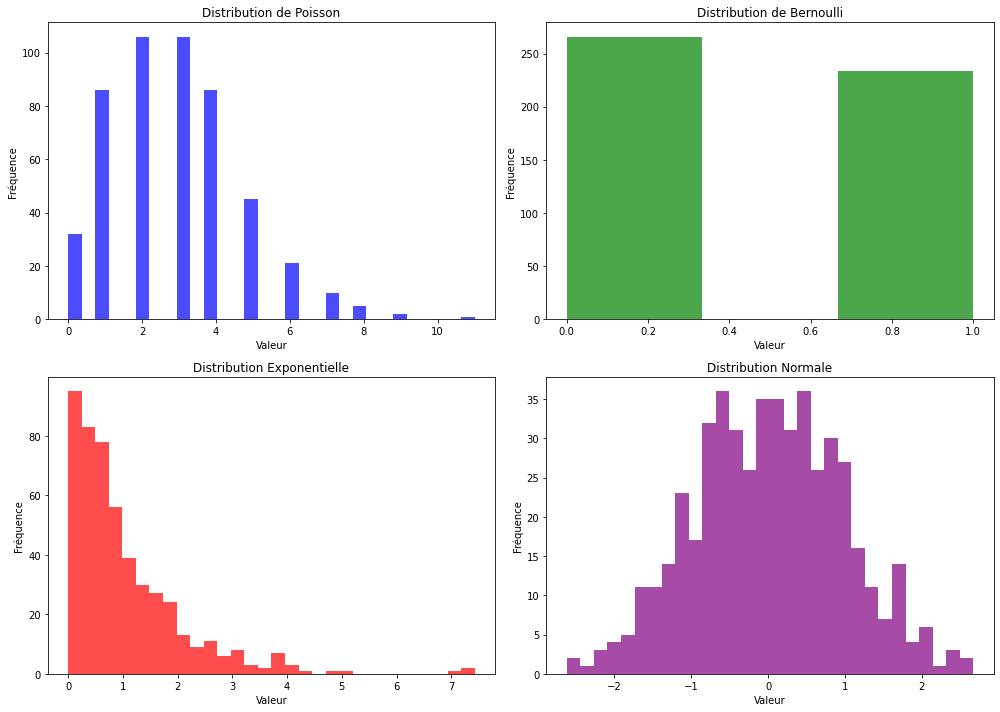

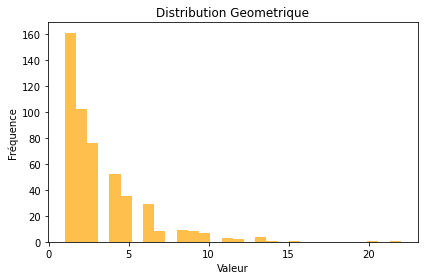

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres des distributions
lambda_poisson = 3
p_bernoulli = 0.5
lambda_expo = 1
mu_normale = 0
sigma_normale = 1
p_geo =  0.3

# Génération des échantillons
samples_poisson = np.random.poisson(lambda_poisson, n)
samples_bernoulli = np.random.binomial(1, p_bernoulli, n)
samples_expo = np.random.exponential(1 / lambda_expo, n)
samples_normale = np.random.normal(mu_normale, sigma_normale, n)
samples_geometric = np.random.geometric(p_geo, n)
# Création des graphiques
plt.figure(figsize=(14, 10))

# Poisson
plt.subplot(2, 2, 1)
plt.hist(samples_poisson, bins=30, color='blue', alpha=0.7)
plt.title('Distribution de Poisson')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Bernoulli
plt.subplot(2, 2, 2)
plt.hist(samples_bernoulli, bins=3, color='green', alpha=0.7)
plt.title('Distribution de Bernoulli')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Exponentielle
plt.subplot(2, 2, 3)
plt.hist(samples_expo, bins=30, color='red', alpha=0.7)
plt.title('Distribution Exponentielle')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Normale
plt.subplot(2, 2, 4)
plt.hist(samples_normale, bins=30, color='purple', alpha=0.7)
plt.title('Distribution Normale')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Geometrique
plt.hist(samples_geometric, bins=30, color='orange', alpha=0.7)
plt.title('Distribution Geometrique')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


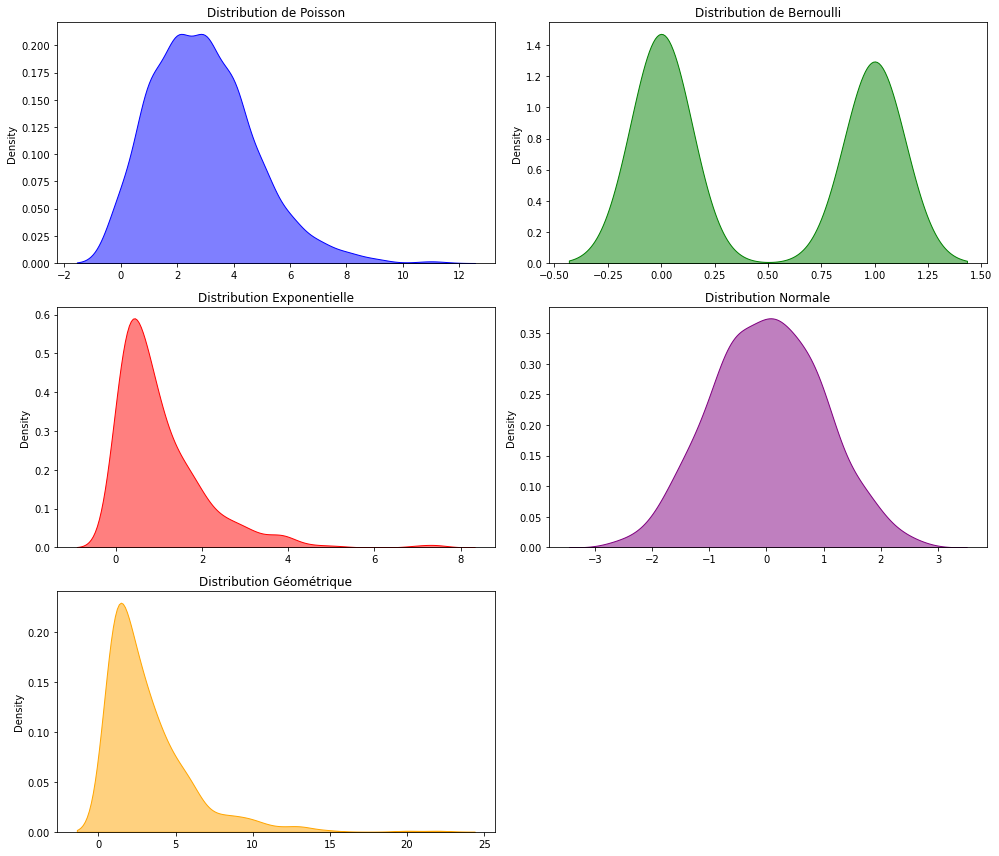

In [3]:
# Création des graphiques
plt.figure(figsize=(14, 12))

# Poisson
plt.subplot(3, 2, 1)
sns.kdeplot(samples_poisson, color='blue', fill=True, alpha=0.5)
plt.title('Distribution de Poisson')

# Bernoulli
plt.subplot(3, 2, 2)
sns.kdeplot(samples_bernoulli, color='green', fill=True, alpha=0.5)
plt.title('Distribution de Bernoulli')

# Exponentielle
plt.subplot(3, 2, 3)
sns.kdeplot(samples_expo, color='red', fill=True, alpha=0.5)
plt.title('Distribution Exponentielle')

# Normale
plt.subplot(3, 2, 4)
sns.kdeplot(samples_normale, color='purple', fill=True, alpha=0.5)
plt.title('Distribution Normale')

# Geometrique
plt.subplot(3, 2, 5)
sns.kdeplot(samples_geometric, color='orange', fill=True, alpha=0.5)
plt.title('Distribution Géométrique')

plt.tight_layout()
plt.show()


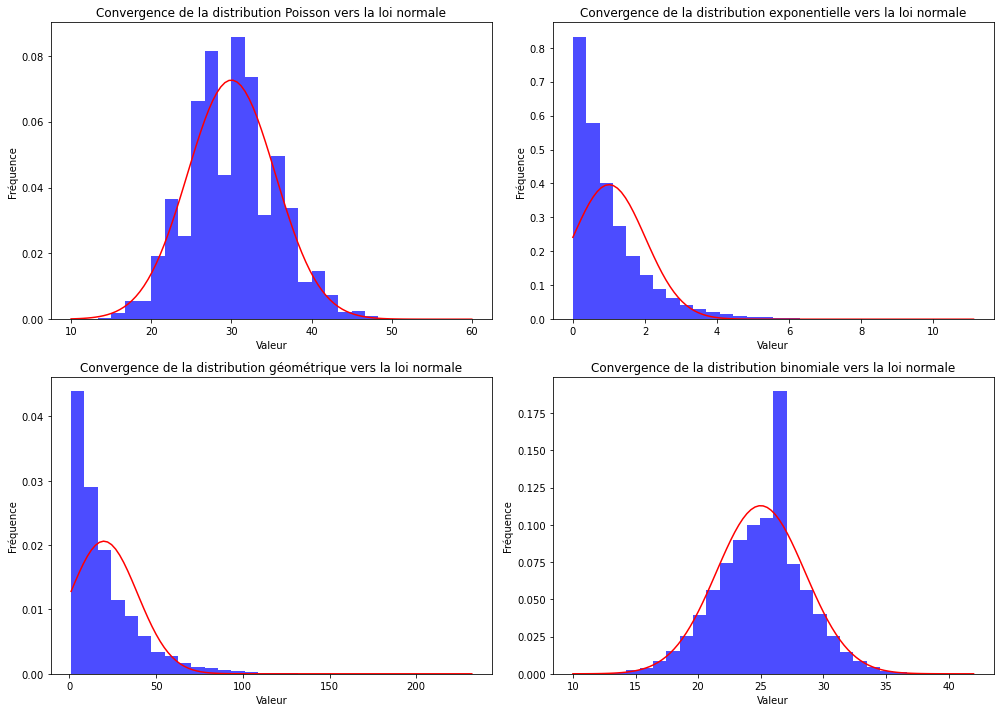

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration pour les distributions
num_simulations = 100000

# Paramètres des distributions
lambda_poisson = 30
poisson_samples = np.random.poisson(lambda_poisson, num_simulations)

lambda_expo = 1  # paramètre de taux
expo_samples = np.random.exponential(1/lambda_expo, num_simulations)

p_geo = 0.05  # probabilité de succès
geo_samples = np.random.geometric(p_geo, num_simulations)

n_binom = 50  # nombre d'essais
p_binom = 0.5  # probabilité de succès
binom_samples = np.random.binomial(n_binom, p_binom, num_simulations)

# Fonction pour tracer les histogrammes et les courbes normales
def plot_distribution(ax, samples, title, mean=None, std_dev=None):
    ax.hist(samples, bins=30, color='blue', alpha=0.7, density=True)
    ax.set_title(title)
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')

    if mean is None:
        mean = np.mean(samples)
    if std_dev is None:
        std_dev = np.std(samples)

    x = np.linspace(min(samples), max(samples), 100)
    ax.plot(x, 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean)**2 / (2 * std_dev**2)), color='red')

# Créer la figure et les sous-graphes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Tracer les distributions
plot_distribution(axs[0, 0], poisson_samples, 'Convergence de la distribution Poisson vers la loi normale')
plot_distribution(axs[0, 1], expo_samples, 'Convergence de la distribution exponentielle vers la loi normale')
plot_distribution(axs[1, 0], geo_samples, 'Convergence de la distribution géométrique vers la loi normale')
plot_distribution(axs[1, 1], binom_samples, 'Convergence de la distribution binomiale vers la loi normale', mean=n_binom*p_binom, std_dev=np.sqrt(n_binom*p_binom*(1-p_binom)))

plt.tight_layout()
plt.show()
